# 선형회귀

In [4]:
import numpy as np

# 이상치 미존재
x1 = np.array([10, 9, 3, 2])
y1 = np.array([90, 80, 50, 30])

# 이상치 존재
x2 = np.array([10, 9, 3, 2, 11])
y2 = np.array([90, 80, 50, 30,40])

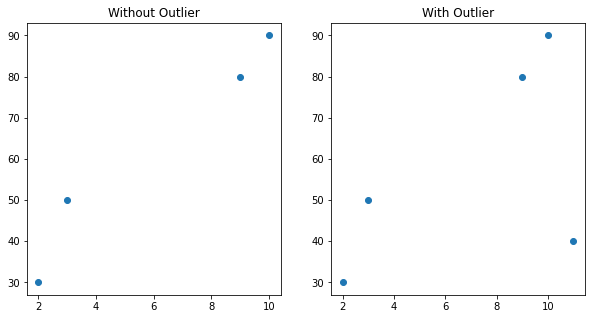

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x1, y1)
plt.title('Without Outlier')

plt.subplot(1, 2, 2)
plt.scatter(x2, y2)
plt.title('With Outlier')
plt.show()

### 최소제곱법
- LinearRegression

In [6]:
# 최소 제곱법 구현

def OLS(x, y):
    w = np.sum((x-x.mean()) * (y-y.mean())) / np.sum((x-x.mean())**2)
    b = y.mean() - w * x.mean()
    return w, b

In [7]:
# w: 기울기, b: 편향

w1, b1 = OLS(x1,y1)
w2, b2 = OLS(x2,y2)
w1,b1,w2,b2         

(6.6, 22.900000000000006, 3.4285714285714284, 34.0)

In [8]:
# 예측값
x1_pred = x1 * w1 + b1
x2_pred = x2 * w2 + b2
x1_pred, x2_pred

(array([88.9, 82.3, 42.7, 36.1]),
 array([68.28571429, 64.85714286, 44.28571429, 40.85714286, 71.71428571]))

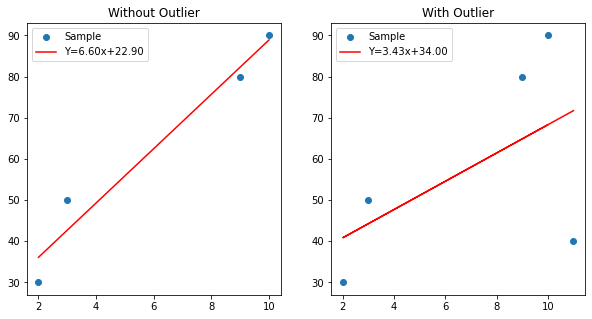

In [9]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x1, y1, label='Sample')                             # 점 그래프
plt.plot(x1, x1_pred, c='red', label=f'Y={w1:.2f}x+{b1:.2f}')   # 선 그래프
plt.legend()
plt.title('Without Outlier')

plt.subplot(1, 2, 2)
plt.scatter(x2, y2, label='Sample')
plt.plot(x2, x2_pred, c='red', label=f'Y={w2:.2f}x+{b2:.2f}')
plt.title('With Outlier')
plt.legend()
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression().fit(x1.reshape(-1,1), y1)    # reshape를 하는 이유 : fit할때 x는 2차원으로, y는 일차원 (fit([x1], y1))
model2 = LinearRegression().fit(x2.reshape(-1,1), y2)

print(model1.coef_, model1.intercept_)
print(model2.coef_, model2.intercept_)

[6.6] 22.899999999999984
[3.42857143] 33.99999999999999


### 경사하강법

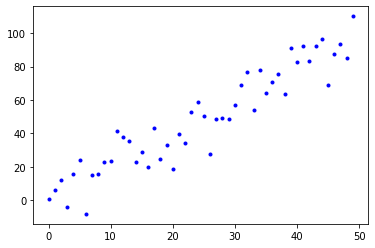

In [32]:
X = np.arange(50)
Y = (2 * X) + 10 * np.random.randn(50)
plt.plot(X, Y, 'b.')

In [33]:
# 모델
from sklearn.linear_model import LinearRegression

X = X.reshape(-1,1)
model = LinearRegression().fit(X, Y)
model.score(X, Y)
model.coef_, model.intercept_

(array([1.94741897]), 0.8809542294798618)

In [34]:
pred = model.predict(X)   # 예측값

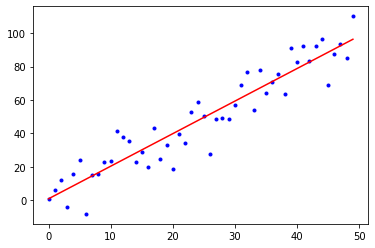

In [35]:
plt.plot(X, Y, 'b.')
plt.plot(X, pred, 'r-')

### 다항변환

In [41]:
# x0 특성을 2차항으로 변환

from sklearn.preprocessing import PolynomialFeatures
P = PolynomialFeatures(degree=2)
x = np.arange(5).reshape(-1,1)
pd.DataFrame(P.fit_transform(x), columns = P.get_feature_names())

,1,x0,x0^2
0,1.0,0.0,0.0
1,1.0,1.0,1.0
2,1.0,2.0,4.0
3,1.0,3.0,9.0
4,1.0,4.0,16.0


In [42]:
# x0, x1 특성을 2차항으로 변환

from sklearn.preprocessing import PolynomialFeatures
P = PolynomialFeatures(degree=2)
x = np.arange(10).reshape(-1,2)
pd.DataFrame(P.fit_transform(x), columns = P.get_feature_names())

,1,x0,x1,x0^2,x0 x1,x1^2
0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,2.0,3.0,4.0,6.0,9.0
2,1.0,4.0,5.0,16.0,20.0,25.0
3,1.0,6.0,7.0,36.0,42.0,49.0
4,1.0,8.0,9.0,64.0,72.0,81.0


In [43]:
# x0, x1 특성을 2차항으로 변환

from sklearn.preprocessing import PolynomialFeatures
P = PolynomialFeatures(degree=2, include_bias=False)   # 상수항 제거
x = np.arange(10).reshape(-1,2)
pd.DataFrame(P.fit_transform(x), columns = P.get_feature_names())

,x0,x1,x0^2,x0 x1,x1^2
0,0.0,1.0,0.0,0.0,1.0
1,2.0,3.0,4.0,6.0,9.0
2,4.0,5.0,16.0,20.0,25.0
3,6.0,7.0,36.0,42.0,49.0
4,8.0,9.0,64.0,72.0,81.0


# 보스턴 집값 데이터셋

In [11]:
# 경고메세지 끄기
import warnings
warnings.filterwarnings(action='ignore')
# 경고메세지 켜기
# warnings.filterwarnings(action='default') 

from sklearn.datasets import load_boston

boston = load_boston()
i
# boston -> 데이터프레임으로 변환
import pandas as pd                       
boston_df = pd.DataFrame(
    boston['data'],
    columns = boston['feature_names']
)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [12]:
# 집값 -> 데이터프레임에 포함되어있지 않음
boston_df['price'] = boston['target']     
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 선형회귀

In [13]:
# 선형회귀 모델링
Y = boston_df['price']
X = boston_df.drop(columns = 'price')

In [14]:
# 데이터 분할
from sklearn.model_selection import train_test_split

x_tr, x_te, y_tr, y_te = train_test_split(
    X, Y, random_state = 100      # 선형분석에서는 stratify 사용 불가
)

In [15]:
# 모델
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_tr, y_tr)
model.score(x_tr, y_tr), model.score(x_te, y_te)

(0.7421573768304615, 0.7246154314616744)

### 표준화
- 분할하기 전, X 전체에 fit을 시키는 것이 효율적
- X_newi = (Xi - mean(X)) / std(X)

In [18]:
# 1. train과 test로 분할 후 fit시키기

Y = boston_df['price']
X = boston_df.drop(columns = 'price')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_tr, x_te, y_tr, y_te = train_test_split(
    X, Y, random_state = 100      # 선형분석에서는 stratify 사용 불가
)

# 표준화 - X_tr과 X_te를 나누어 fit
x_tr_sc = scaler.fit_transform(x_tr)    # train과 test를 나눈 후 fit 시킴
x_te_sc = scaler.transform(x_te)

In [19]:
# 2. train과 test로 분할 전 fit시키기
Y = boston_df['price']
X = boston_df.drop(columns = 'price')

# 표준화 - X 전체
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)     # X전체를 fit 시킴

x_tr, x_te, y_tr, y_te = train_test_split(
    X_sc, Y, random_state = 100      # 선형분석에서는 stratify 사용 불가
)

model = LinearRegression().fit(x_tr, y_tr)
model.score(x_tr, y_tr), model.score(x_te, y_te)

(0.7421573768304615, 0.7246154314616728)

### 정규화
* 데이터를 0~1사이의 값으로 변환
  - X_new = (Xi - min(Xi)) / (max(Xi) - min(Xi))

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_sc = scaler.fit_transform(X)

x_tr, x_te, y_tr, y_te = train_test_split(
    X_sc, Y, random_state = 100      # 선형분석에서는 stratify 사용 불가
)

model = LinearRegression().fit(x_tr, y_tr)
model.score(x_tr, y_tr), model.score(x_te, y_te)

(0.7421573768304615, 0.7246154314616738)

### 이상치 확인 및 제거

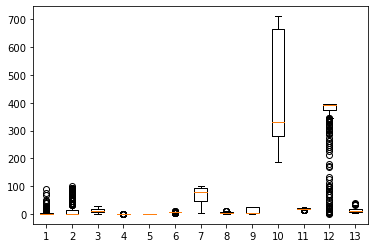

In [21]:
import matplotlib.pyplot as plt

plt.boxplot(boston['data'])
plt.show()

In [22]:
Q1 = boston_df['B'].quantile(0.25)
Q3 = boston_df['B'].quantile(0.75)
IQR = Q3 - Q1
MAX = Q3 + 1.5 * IQR
MIN = Q1 - 1.5 * IQR
MAX, MIN

(427.49625000000003, 344.10624999999993)

In [23]:
target = boston_df['B'][
    (boston_df['B'] < MIN) | (boston_df['B'] > MAX)
]
target

18     288.99
25     303.42
27     306.38
32     232.60
34     248.31
        ...  
466     22.01
467    331.29
475    302.76
489    344.05
490    318.43
Name: B, Length: 77, dtype: float64

In [24]:
boston_df = boston_df.drop(target.index)    # 행삭제
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [56]:
Y = boston_df['price']
X = boston_df.drop(columns = 'price')

x_tr, x_te, y_tr, y_te = train_test_split(
    X, Y, random_state = 100      # 선형분석에서는 stratify 사용 불가
)

model = LinearRegression().fit(x_tr, y_tr)
model.score(x_tr, y_tr), model.score(x_te, y_te)

# tr ↓ te ↑ : 좋은결과 (tr_score < te_score)

(0.7333970447189131, 0.7605037585652703)

### 로그 변환
- log 사용시 x값이 0일 경우, 오류발생 가능 → log1p(log(1+x)) 사용

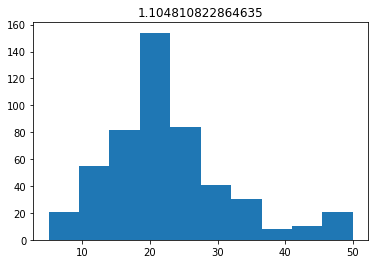

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew

plt.hist(boston['target'])
plt.title(f"{skew(boston['target'])}")
plt.show()

### 다항변환

In [57]:
P = PolynomialFeatures(degree=3, include_bias=False)
x_poly = P.fit_transform(boston_df.loc[:, 'CRIM':'LSTAT'])
x_train, x_test, y_train, y_test = train_test_split(x_poly, Y, random_state=0)
boston_df.loc[:, 'CRIM':'LSTAT'].shape, x_poly.shape

((429, 13), (429, 559))

In [58]:
model = LinearRegression().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, -689.7085142551108)